#### Autoregressive Integrated Moving Average (ARIMA) - Most Commonly Used
from pylab import rcParams

1. Create time-series or time-series decomposition (3 components: trend, seasonality, noise)
2. Apply ARIMA (Autoregressive Integrated Moving Average) Method - creating parameter selection to find optimal set of parameters 
3. Fitting model to observed data
4. Validating fit using RMS
5. Visualization

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
# Load Seismic Data
seismic_file = '/home/jovyan/data/hypo71.dat.txt'
df_seismic_data = pd.read_csv(seismic_file, delim_whitespace=True, dtype=object)
df_seismic_data['datetime'] = df_seismic_data['yyyymmdd'] + 'T' + \
            df_seismic_data['HHMM'].str.slice(start=0, stop=2) + ':' + \
            df_seismic_data['HHMM'].str.slice(start=2) 
df_seismic_data.index = pd.to_datetime(df_seismic_data['datetime'].values)
df_seismic_data['datetime'] = pd.to_datetime(df_seismic_data['datetime'].values)
df_seismic_data = df_seismic_data.loc['2017-01-1 00:00:00':'2019-06-17 00:00:00']
del df_seismic_data['yyyymmdd']
del df_seismic_data['HHMM']
del df_seismic_data['SSS.SS']
del df_seismic_data['Lat(D']
del df_seismic_data['M)']
del df_seismic_data['Lon(D']
del df_seismic_data['M).1']
del df_seismic_data['NWR']
del df_seismic_data['GAP']
del df_seismic_data['DMIN']
del df_seismic_data['ERH']
del df_seismic_data['ERZ']
del df_seismic_data['ID']
del df_seismic_data['PMom']
del df_seismic_data['SMom']
del df_seismic_data['RMS']
# del df_seismic_data['MW']
df_seismic_data['Depth'] = df_seismic_data['Depth'].astype('float64').values
# df_seismic_data['MW'] = df_seismic_data['MW'].astype('float64').values
# df_seismic_data['RMS'] = df_seismic_data['RMS'].astype('float64').values
df_seismic_data.head()

### Time Series Visualization with Python
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

In [ ]:
# Indexing with time series data
df_seismic_data.index

In [2]:
y = df_seismic_data['Depth'].resample('D').mean()
y.head(5)
# len(y)

NameError: name 'df_seismic_data' is not defined

In [3]:
# Slicing datasets to only retrieve datapoints between January 2017 and 2019
# y['2017':]
y['2017-01-01':'2019-01-01']

NameError: name 'y' is not defined

In [4]:
# Checking for missing values
y.isnull().sum()

NameError: name 'y' is not defined

In [67]:
# Handling missing values
y = y.fillna(y.bfill())

In [68]:
y.isnull().sum()

0

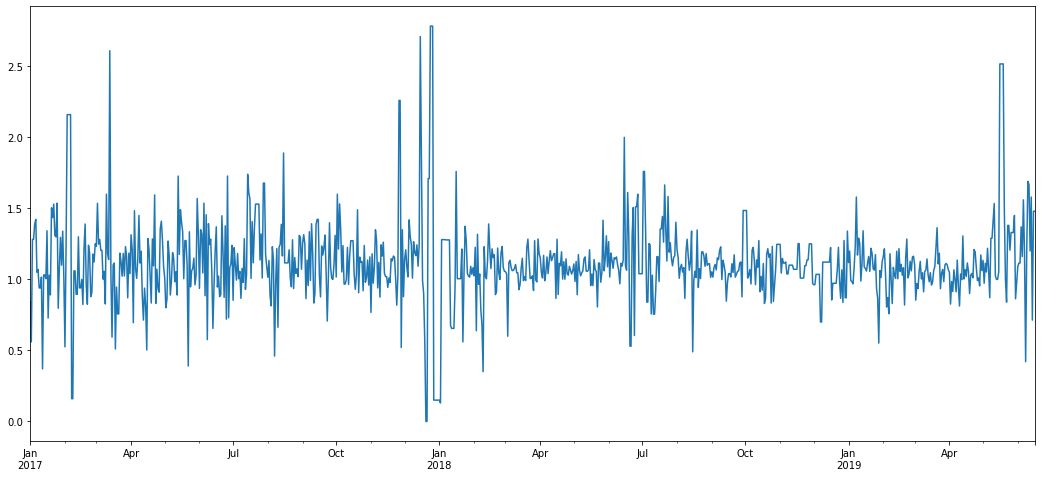

In [69]:
y.plot()
plt.show()

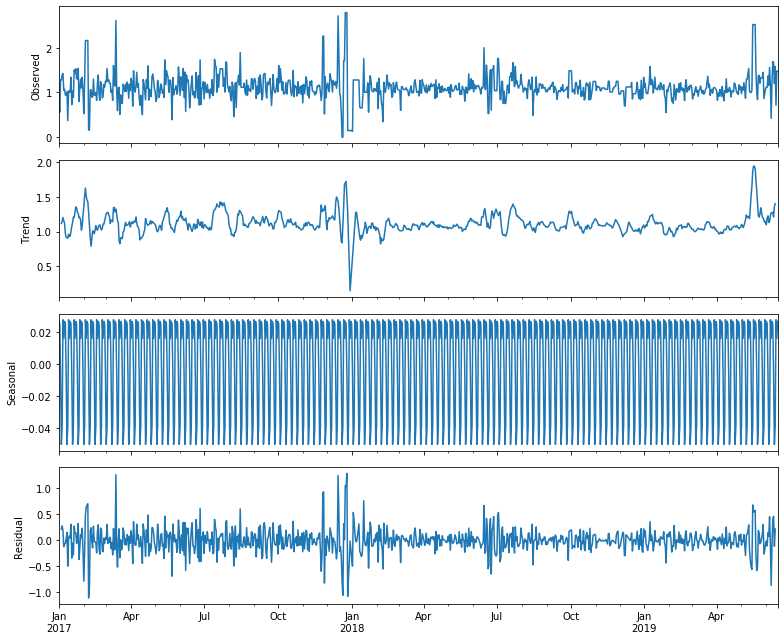

In [71]:
# Perform time-series seasonal decomposition
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

#### Do the same for Depth

#### Time-series decomposition

In [6]:
# import statsmodels.api as sm
# from pylab import rcParams
# rcParams['figure.figsize'] = 18, 8
# decomposition = sm.tsa.seasonal_decompose(y, model='additive')
# fig = decomposition.plot()
# plt.show()

NameError: name 'y' is not defined

#### ARIMA Method

In [86]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

NameError: name 'itertools' is not defined

#### Parameterizing Selection

In [10]:
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             mod = sm.tsa.statespace.SARIMAX(y,
#                                             order=param,
#                                             seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,
#                                             enforce_invertibility=False)
# results = mod.fit()
# print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
#         except:
#             continue

#### Fitting the model

In [11]:
# mod = sm.tsa.statespace.SARIMAX(y,
#                                 order=(1, 1, 1),
#                                 seasonal_order=(1, 1, 0, 12),
#                                 enforce_stationarity=False,
#                                 enforce_invertibility=False)
# results = mod.fit()
# print(results.summary().tables[1])

#### Validating fit

In [13]:
# pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
# pred_ci = pred.conf_int()
# ax = y['2014':].plot(label='observed')
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.2)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# plt.legend()
# plt.show()

#### Visualizing Forecast

In [15]:
# pred_uc = results.get_forecast(steps=100)
# pred_ci = pred_uc.conf_int()
# ax = y.plot(label='observed', figsize=(14, 7))
# pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='k', alpha=.25)
# ax.set_xlabel('Date')
# ax.set_ylabel('y')
# plt.legend()
# plt.show()

### Also Consider PROPHET - good for time-series on different timescales
from fbprophet import Prophet